# **Build the Recommender System for Japan Actresses**

## ***Data Source: https://github.com/conanak99/jav-py.git***

### **1. Clone Data from Github:**

In [1]:
!git clone https://github.com/conanak99/jav-py.git

Cloning into 'jav-py'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 3), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


### **2. Import Libraries:**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore") 
from sklearn import metrics

### **3. Data Analyst:**

In [3]:
actress = pd.read_json("jav-py/acctress.json")
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [4]:
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11186 non-null  int64  
 1   name         11186 non-null  object 
 2   japanName    11186 non-null  object 
 3   hiragana     11186 non-null  object 
 4   bust         6456 non-null   float64
 5   waist        6436 non-null   float64
 6   hip          6428 non-null   float64
 7   height       5012 non-null   float64
 8   birthday     4031 non-null   object 
 9   blood_type   3171 non-null   object 
 10  hobby        3730 non-null   object 
 11  prefectures  4471 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


#### ***3.1. Age Analyst:***

In [5]:
actress['birthday'] = pd.to_datetime(actress['birthday'], yearfirst=True)
actress['Age'] = 2021 - pd.DatetimeIndex(actress['birthday']).year

In [6]:
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,Age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,41.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,43.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,39.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,38.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,51.0


In [7]:
actress.describe()

,id,bust,waist,hip,height,Age
count,1.118600e+04,6456.000000,6436.000000,6428.000000,5012.000000,4031.000000
mean,4.852872e+05,87.094253,58.898229,86.289203,158.713148,36.704788
std,5.076289e+05,6.155405,3.176163,3.829804,5.814022,7.262923
min,3.000000e+00,51.000000,48.000000,54.000000,134.000000,20.000000
25%,7.189000e+03,83.000000,58.000000,84.000000,155.000000,32.000000
50%,2.678500e+04,86.000000,58.000000,86.000000,158.000000,36.000000
75%,1.026770e+06,90.000000,60.000000,88.000000,163.000000,41.000000
max,1.063061e+06,153.000000,100.000000,125.000000,182.000000,66.000000


In [8]:
actress[actress['Age'] == actress.Age.min()]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,Age
9826,1059504,Maki Izuna,槙いずな,まきいずな,80.0,55.0,84.0,148.0,2001-01-27,None,読書,東京都,20.0
9933,1061822,Takeda Erena,武田エレナ,たけだえれな,NaN,NaN,NaN,NaN,2001-08-08,None,None,静岡県,20.0


#### Maki Izuna
![maki](https://i.ebayimg.com/images/g/oPMAAOSw5udfnJx-/s-l400.jpg)

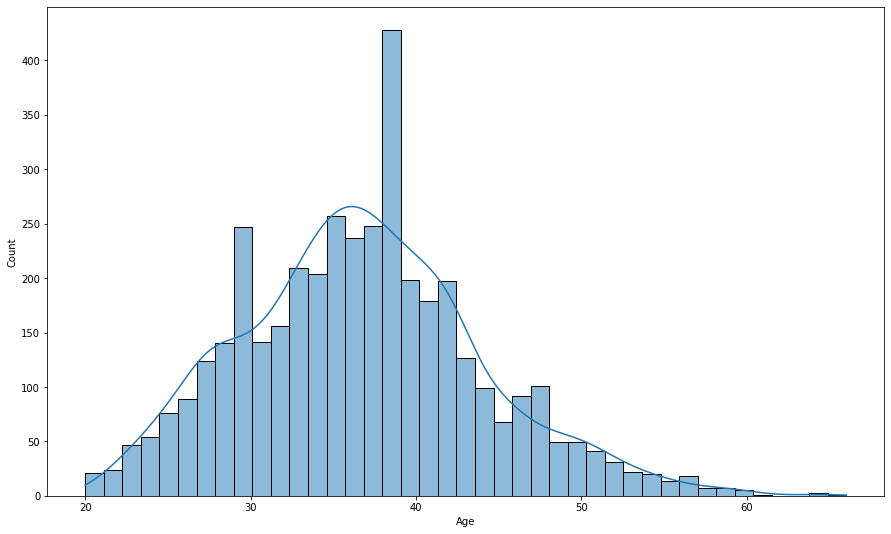

In [9]:
plt.figure(figsize=(15,9))
sns.histplot(actress.Age.dropna(), kde=True)

#### ***3.2. Hobby Analyst:***

In [10]:
hobby_df = actress[actress.hobby.notnull()]
hobby_df

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,Age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,41.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,43.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,39.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,38.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11175,10495,Oohara Satomi,大原里美,おおはらさとみ,90.0,58.0,90.0,NaN,1979-07-05,O,剣道、料理、水泳,千葉県,42.0
11176,10517,Suzue Mona,鈴江紋奈,すずえもな,83.0,58.0,85.0,165.0,1986-07-08,O,ランニング、カラオケ、チアリーディング,None,35.0
11181,10538,Tomita Sayaka,富田さやか,とみたさやか,80.0,60.0,83.0,NaN,1980-12-05,O,料理、お買い物,None,41.0
11182,10540,Mizimoto Miwa,藤本美羽,ふじもとみわ,88.0,58.0,87.0,153.0,1984-08-28,O,ショッピング、料理,東京都,37.0


In [11]:
hobby_txt = ''.join(hobby_df['hobby'])

In [20]:
from wordcloud import WordCloud

hobbycloud = WordCloud(font_path = 'jav-py/jp.otf', max_words = 200, max_font_size = 40, scale = 3).generate(hobby_txt)

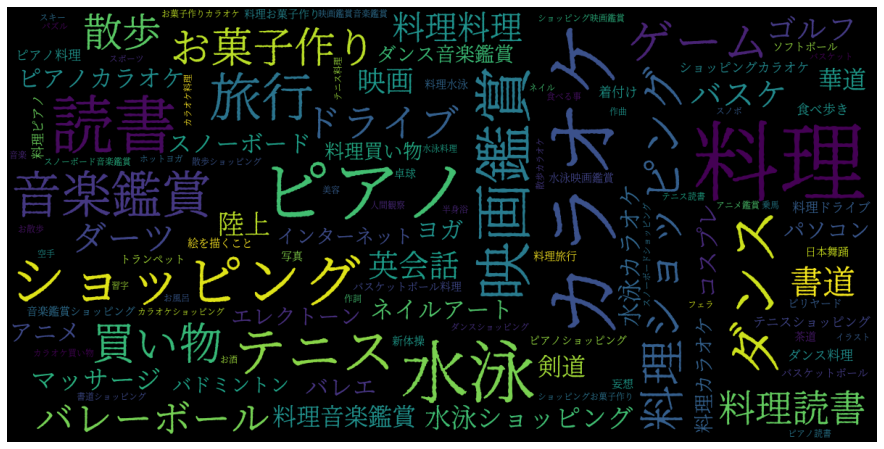

In [21]:
plt.figure(figsize=(16,8))
plt.imshow(hobbycloud)
plt.axis('off')
plt.show()

In [22]:
from PIL import Image
mask = np.array(Image.open("jav-py/mask_black.png"))

In [23]:
hobbycloud = WordCloud(font_path = 'jav-py/jp.otf', max_words = 200, background_color="white", mask=mask).generate(hobby_txt)

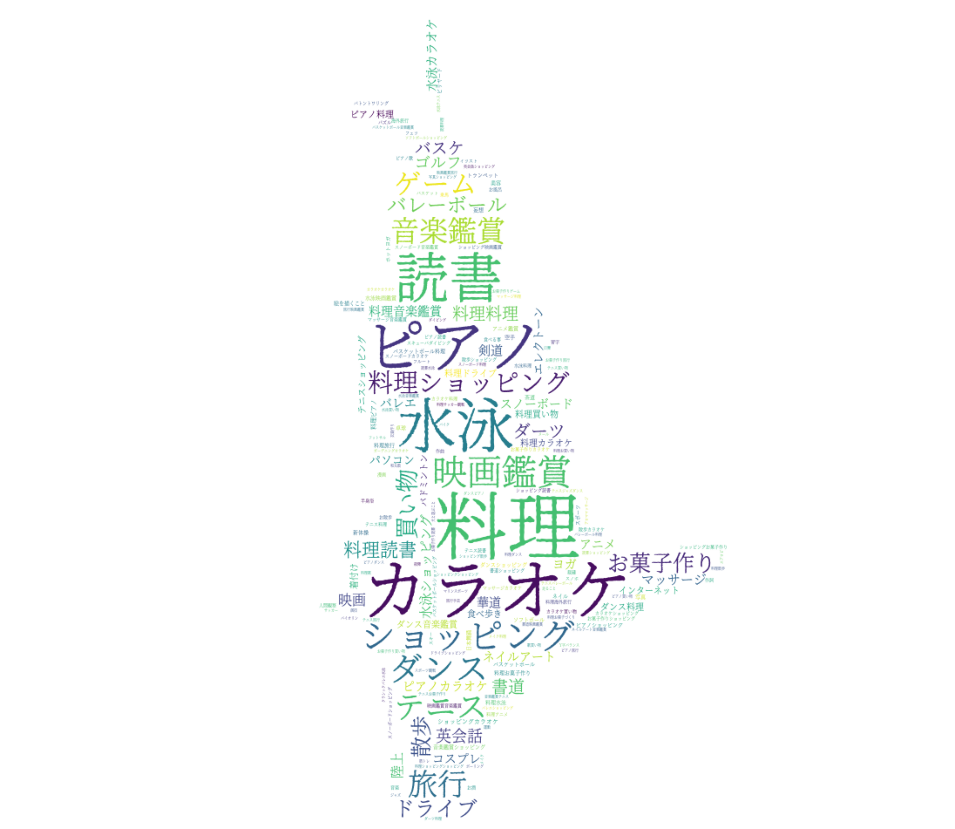

In [25]:
plt.figure(figsize=(25,15))
plt.imshow(hobbycloud)
plt.axis('off')
plt.show()

### **4. Recommender System:**

#### ***4.1. Get 5 columns from dataframe actress:***

In [29]:
df = actress[['bust', 'waist', 'hip', 'height', 'blood_type']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [30]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.5+ KB


In [31]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,A
2,96.0,55.0,85.0,168.0,B
3,80.0,59.0,82.0,162.0,O
4,82.0,55.0,89.0,162.0,A
6,85.0,60.0,88.0,165.0,A


In [32]:
df.blood_type.value_counts()

A     1100
O      939
B      422
AB     217
Name: blood_type, dtype: int64

#### ***4.2. Encoding the column "blood_type":***

In [33]:
mapper = {'O': 0, 'A': 1, 'B': 2, 'AB': 3}
df['blood_type']= df['blood_type'].map(mapper)
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


In [34]:
actress_np = df.to_numpy()
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

#### ***4.3. K_Mean_Cluster:***

##### ***4.3.1. Test K_Mean Algorithms with n_clusters = 5, n_clusters = 4:***

**n_clusters = 5:**

In [35]:
k_mean_5 = KMeans(n_clusters=5)
k_mean_5.fit(actress_np)
label_5 = k_mean_5.labels_

In [36]:
label_5

array([4, 0, 3, ..., 0, 4, 0], dtype=int32)

In [55]:
s_score_5 = metrics.silhouette_score(actress_np, label_5, metric="euclidean")
s_score_5

0.23703995427634916

In [56]:
c_score_5 = metrics.calinski_harabasz_score(actress_np, label_5)
c_score_5

1065.3489570759602

**n_clusters = 4:**

In [50]:
k_mean_4 = KMeans(n_clusters=4)
model4 = k_mean_4.fit(actress_np)
result4 = k_mean_4.labels_

In [51]:
result4

array([0, 3, 0, ..., 3, 2, 0], dtype=int32)

In [57]:
s_score_4 = metrics.silhouette_score(actress_np, result4, metric="euclidean")
s_score_4

0.23670727990905457

In [58]:
c_score_4 = metrics.calinski_harabasz_score(actress_np, result4)
c_score_4

1130.9785200712342

##### ***4.3.2. Find the right n_clusters:***

In [39]:
sum_distances = []
K = range(1,15)
for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(actress_np)
  sum_distances.append(k_mean.inertia_)

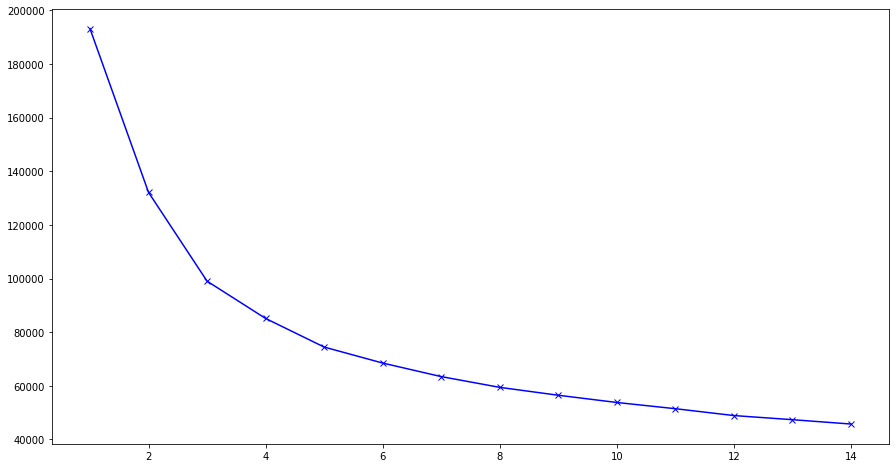

In [40]:
plt.plot(K, sum_distances, 'bx-')
plt.show()

In [41]:
k_mean_3 = KMeans(n_clusters=3)
model = k_mean_3.fit(actress_np)
result = k_mean_3.labels_

In [42]:
result

array([0, 1, 2, ..., 2, 0, 2], dtype=int32)

In [59]:
s_score_3 = metrics.silhouette_score(actress_np, result, metric="euclidean")
s_score_3

0.3043234849568844

In [60]:
c_score_3 = metrics.calinski_harabasz_score(actress_np, result)
c_score_3

1271.410864107087

In [63]:
tb = {'n_clusters = 5': [s_score_5, c_score_5], 'n_clusters = 4': [s_score_4, c_score_4], 'n_clusters = 3': [s_score_3, c_score_3]}
table_score = pd.DataFrame(tb, index=['silhouette_score', 'calinski_harabasz_score'])
table_score

,n_clusters = 5,n_clusters = 4,n_clusters = 3
silhouette_score,0.237040,0.236707,0.304323
calinski_harabasz_score,1065.348957,1130.978520,1271.410864


In [45]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


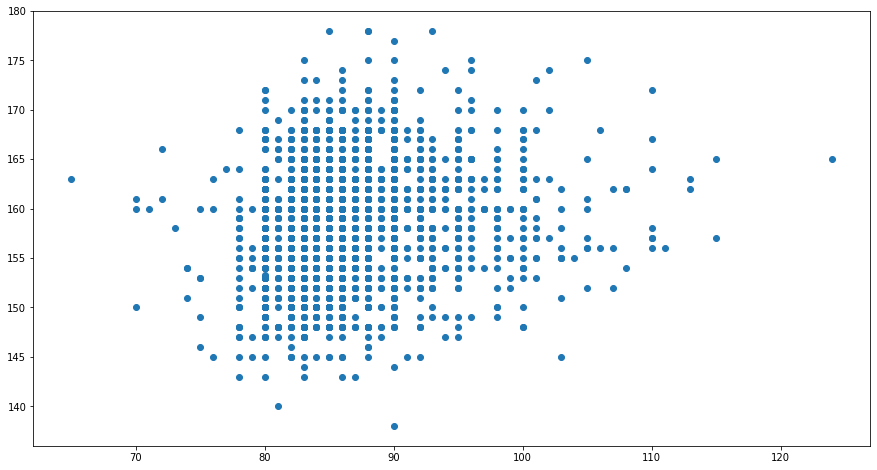

In [46]:
plt.scatter(actress_np[:,0], actress_np[:,3])
plt.show()

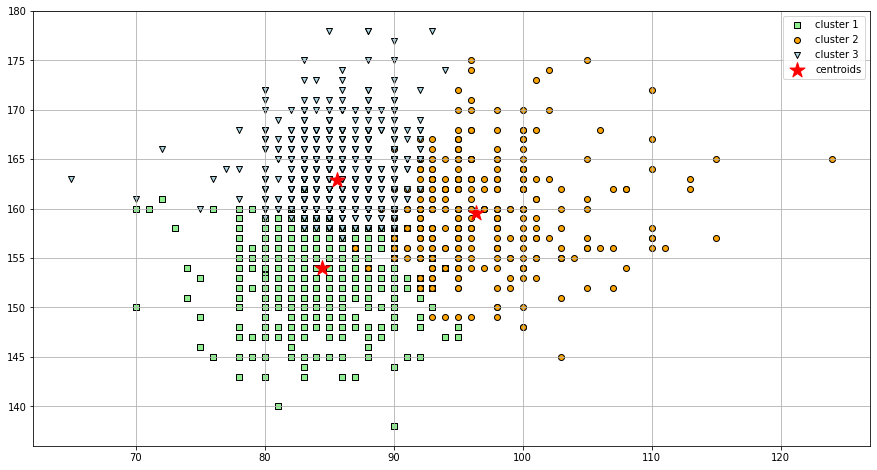

In [49]:
plt.scatter(actress_np[result == 0, 0], actress_np[result == 0, 3],
            c = 'lightgreen',
            marker = 's',
            edgecolor = 'black', # border color
            label = 'cluster 1'
)
plt.scatter(actress_np[result == 1, 0], actress_np[result == 1, 3],
            c = 'orange',
            marker = 'o',
            edgecolor = 'black', # border color
            label = 'cluster 2'
)
plt.scatter(actress_np[result == 2, 0], actress_np[result == 2, 3],
            c = 'lightblue',
            marker = 'v',
            edgecolor = 'black', # border color
            label = 'cluster 3'
)
plt.scatter(
    model.cluster_centers_[:,0], model.cluster_centers_[:,3],
    s = 250,marker = '*',
    c = 'red',
    label = 'centroids'
)

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

#### ***4.4. Build Recommender System:***

*Input: bust, waist, hip, height, blood_type*

*--> which cluster ?*

*random(10) in the clusters*


In [64]:
df1 = actress[['id', 'bust', 'waist', 'hip', 'height', 'blood_type']]
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 146.5+ KB


In [65]:
df2 = actress[['id', 'name', 'japanName']]
df2.head()

,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


In [66]:
lookup = df1.merge(df2, on='id', how='left') # Merge df1 and df2
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [67]:
lookup['cluster'] = result
lookup.head()

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,0
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,1
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,2
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,2
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,2


In [77]:
def recommend(model, bust, waist, hip, height, blood_type):
  arr = np.array([[bust, waist, hip, height, blood_type]])
  predict = model.predict(arr)
  return lookup[lookup['cluster'] == predict[0]].sample(20)

In [78]:
bust = 90
waist = 60
hip = 90
height = 160
blood_type = 1 

recommend(model, bust, waist, hip, height, blood_type)

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
1157,28210,95.0,58.0,85.0,156.0,O,Hanagi Anon,花木あのん,1
1621,1014428,90.0,58.0,90.0,159.0,O,Nisiyama Mari,西山真理,1
725,20772,95.0,61.0,88.0,149.0,O,Nagase Aki,永瀬あき,1
2093,1035874,97.0,58.0,88.0,160.0,O,Kuroki Mio,黒木澪,1
2274,1053417,96.0,56.0,91.0,163.0,AB,Masiro Mao,真白真緒,1
1121,2723,90.0,62.0,86.0,157.0,O,Hyouzaki Saya,氷咲沙弥,1
1554,1011751,94.0,60.0,87.0,162.0,O,Hosizaki Emiri,星崎エミリ,1
2355,5968,94.0,59.0,86.0,154.0,O,Ikegami Reiko,池上れいこ,1
72,10857,92.0,61.0,86.0,158.0,A,Motiduki Kana,望月加奈（松沢真理）,1
497,17411,92.0,60.0,86.0,160.0,O,Wakamiya Rina,若宮莉那,1
